In [3]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

models['Ans'].hr_effects_enabled = True
models['Ans'].mv_effects_enabled: bool = False
models['Ans'].venpool_effects_enabled: bool = False
models['Ans'].cont_effects_enabled: bool = False
models['Ans'].svr_effects_enabled: bool = False
models['Ans'].pvr_effects_enabled: bool = False

 Model 'normal neonate' loaded and initialized correctly.


 Ready in 3.0 sec. Average model step in 0.0251 ms.


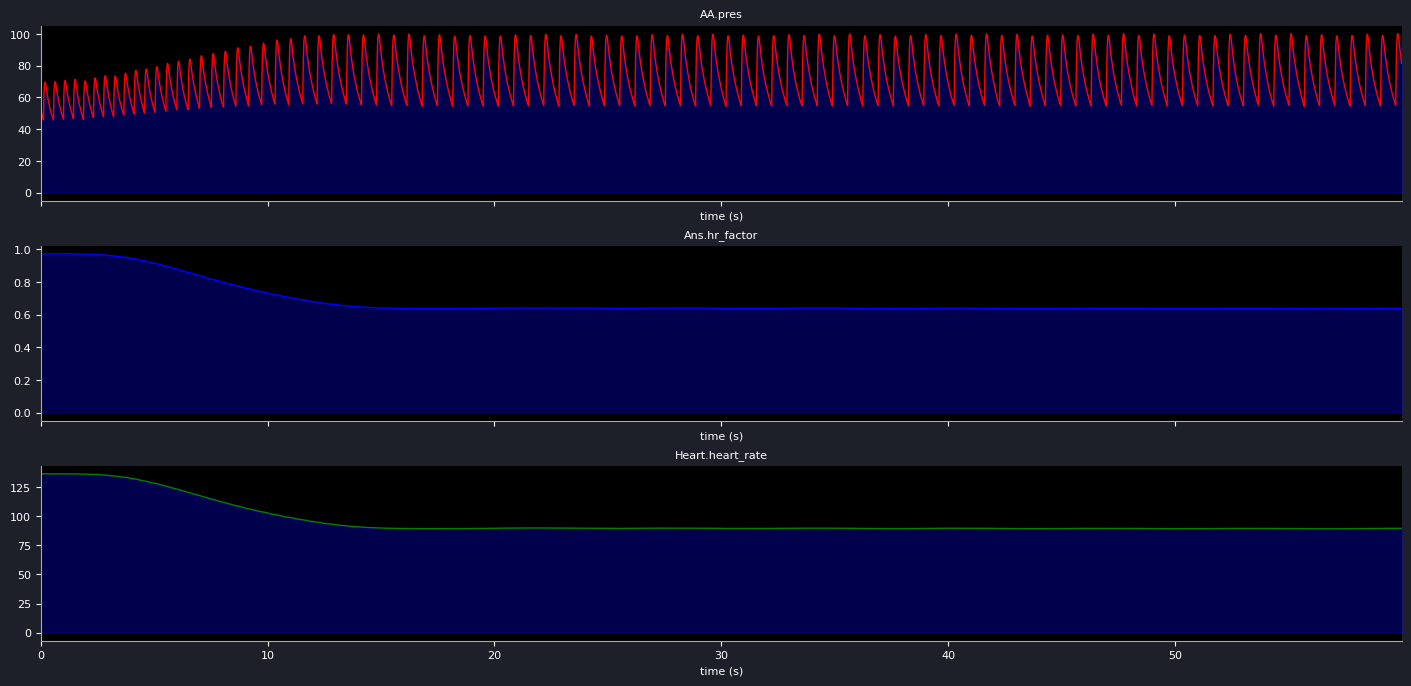


AA.pres         : max  100.17817, min   45.82229 mmHg
Ans.hr_factor   : max    0.97424 min    0.63664
Heart.heart_rate: max  136.39384 min   89.13013


In [4]:
# # 51/34 160 
# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
models["Fluids"].add_volume(vol=75, in_time=10)
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres","Ans.hr_factor", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

All off -> 75 ml loss -> 36/21      hr 140
Only HR -> 75 ml loss -> 35.8/24.2  hr 190